In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Prepo 1 (Visualisasi)
import missingno as mno
from fast_ml.feature_selection import get_duplicate_features

# Prepo 2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import FunctionTransformer

# Model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Score
from sklearn.metrics import accuracy_score, make_scorer


In [2]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [4]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [5]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [6]:
# Ubah tipe Mobile_phone, Work_phone, Phone, Email, dan label menjadi kategori
data['Mobile_phone'] = data['Mobile_phone'].astype('category')
data['Work_Phone'] = data['Work_Phone'].astype('category')
data['Phone'] = data['Phone'].astype('category')
data['EMAIL_ID'] = data['EMAIL_ID'].astype('category')
data['label'] = data['label'].astype('category')

In [7]:
# Membuang feature 'Mobile_phone' karena hanya memiliki satu nilai
data = data.drop(columns=['Mobile_phone'])

In [8]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# # Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

In [9]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0      0.942     0.986     0.963       280
           1      0.765     0.433     0.553        30

    accuracy                          0.932       310
   macro avg      0.853     0.710     0.758       310
weighted avg      0.925     0.932     0.924       310



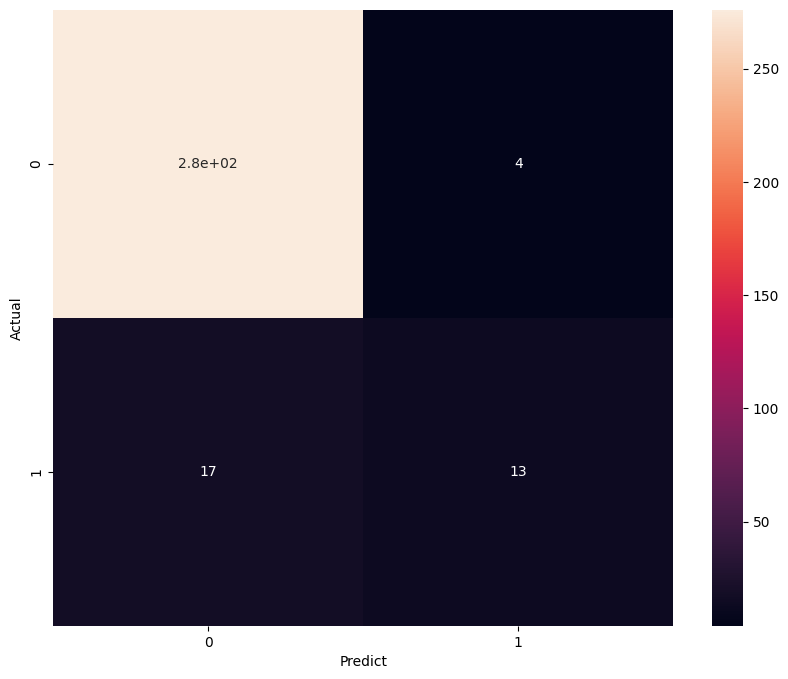

In [10]:
best = BalancedRandomForestClassifier(random_state=0, class_weight = 'balanced_subsample', verbose=0)
best.fit(X_train_resampled, y_train_resampled)
Y_pred = best.predict(X_test_processed)

print(classification_report(y_test, Y_pred, digits=3))
# hapus marital status

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

Learning rate set to 0.014359
0:	learn: 0.6879669	total: 200ms	remaining: 3m 19s
1:	learn: 0.6828849	total: 277ms	remaining: 2m 18s
2:	learn: 0.6772115	total: 334ms	remaining: 1m 51s
3:	learn: 0.6703376	total: 399ms	remaining: 1m 39s
4:	learn: 0.6649832	total: 464ms	remaining: 1m 32s
5:	learn: 0.6566581	total: 515ms	remaining: 1m 25s
6:	learn: 0.6540477	total: 563ms	remaining: 1m 19s
7:	learn: 0.6497286	total: 606ms	remaining: 1m 15s
8:	learn: 0.6469729	total: 645ms	remaining: 1m 11s
9:	learn: 0.6425786	total: 674ms	remaining: 1m 6s
10:	learn: 0.6388357	total: 698ms	remaining: 1m 2s
11:	learn: 0.6340004	total: 728ms	remaining: 59.9s
12:	learn: 0.6290817	total: 761ms	remaining: 57.8s
13:	learn: 0.6259214	total: 788ms	remaining: 55.5s
14:	learn: 0.6237560	total: 818ms	remaining: 53.7s
15:	learn: 0.6199858	total: 851ms	remaining: 52.3s
16:	learn: 0.6148498	total: 903ms	remaining: 52.2s
17:	learn: 0.6107463	total: 944ms	remaining: 51.5s
18:	learn: 0.6087534	total: 987ms	remaining: 51s
19:	

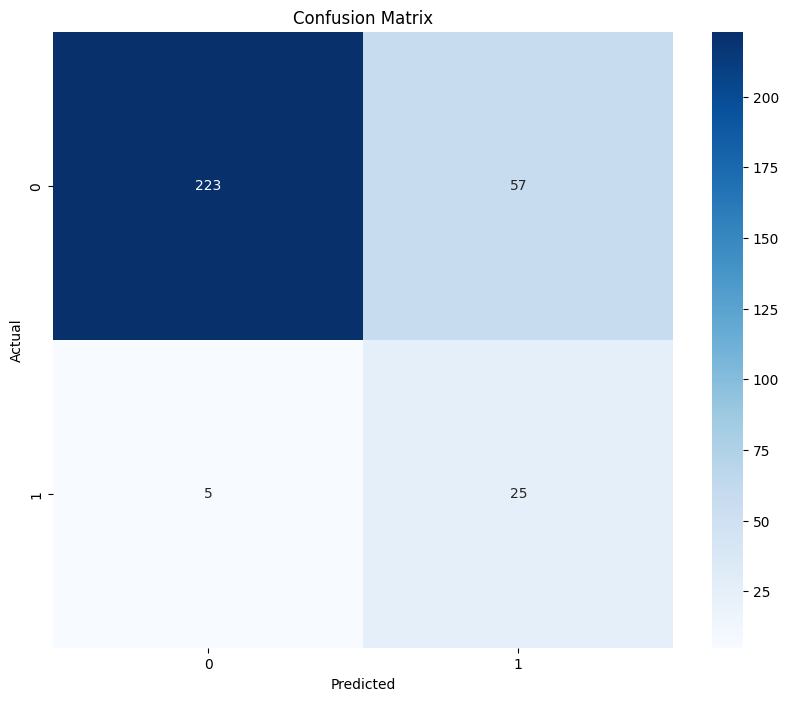

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns


# # Oversample the training data using ADASYN
# oversampler = ADASYN(random_state=42)
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Train the Gradient Boosting model
model = CatBoostClassifier(random_state=0)
model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

# Calculate specificity (1 - FPR)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

# Find the threshold that gives the best geometric mean
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]

# Make predictions using the optimal threshold
y_pred = (y_probs >= optimal_threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_pred, digits=3))

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0      0.950     0.818     0.879       280
           1      0.261     0.600     0.364        30

    accuracy                          0.797       310
   macro avg      0.606     0.709     0.621       310
weighted avg      0.883     0.797     0.829       310



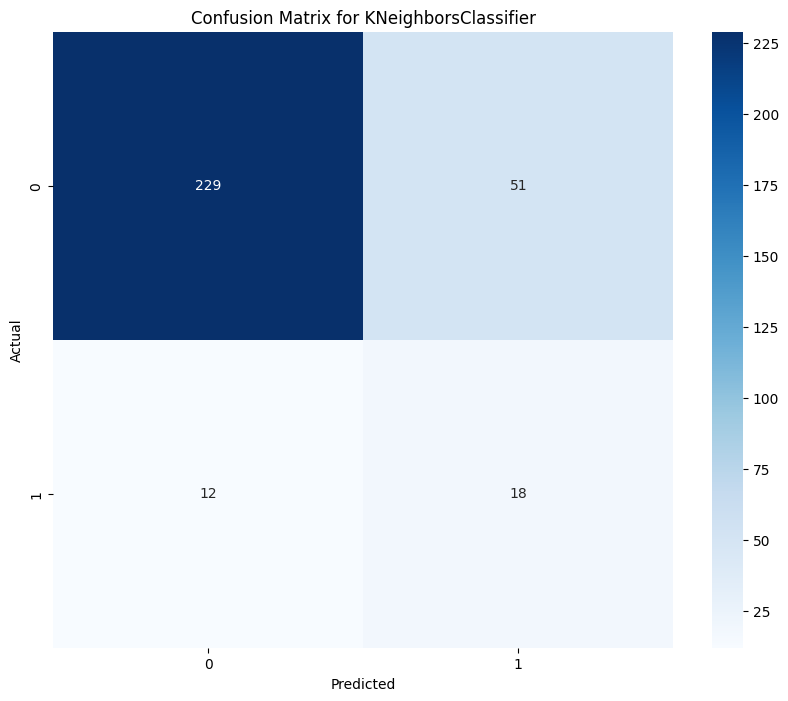

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.963     0.836     0.895       280
           1      0.313     0.700     0.433        30

    accuracy                          0.823       310
   macro avg      0.638     0.768     0.664       310
weighted avg      0.900     0.823     0.850       310



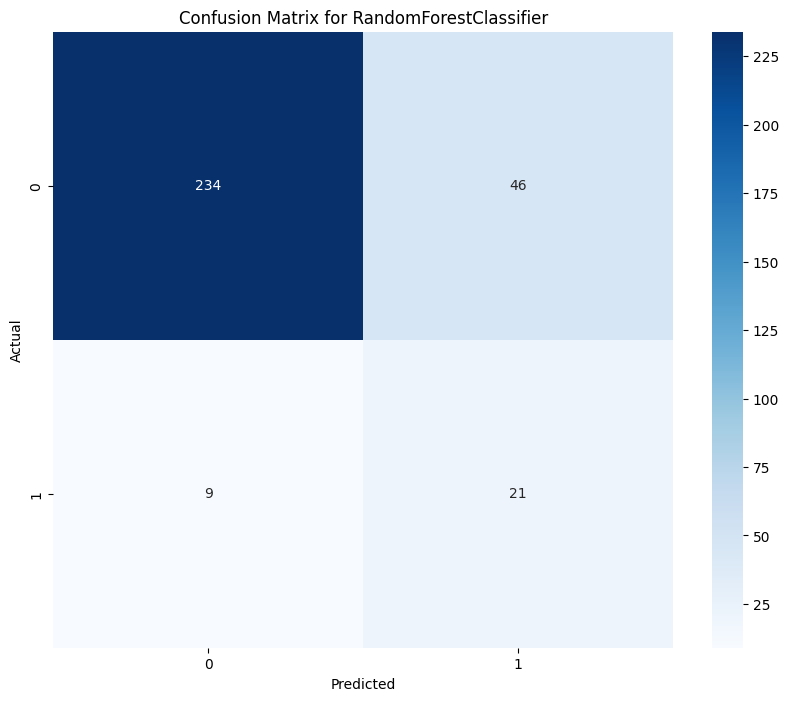

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0      0.981     0.732     0.838       280
           1      0.257     0.867     0.397        30

    accuracy                          0.745       310
   macro avg      0.619     0.799     0.618       310
weighted avg      0.911     0.745     0.796       310



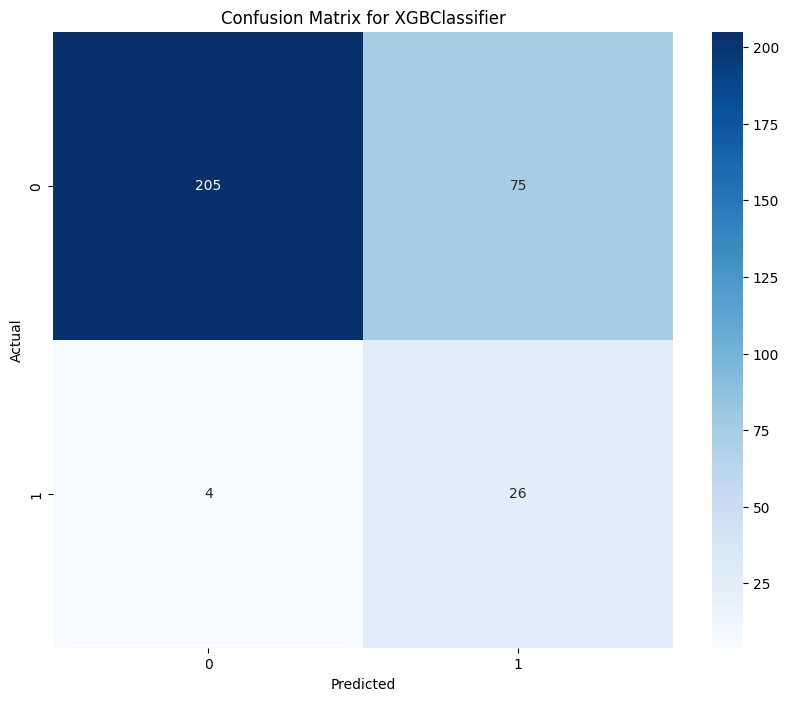

In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "XGBoost": XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
}

# Function to evaluate each model
def evaluate_model(model, X_test_processed, y_test):
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test_processed)[:, 1]

    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

    # Calculate specificity (1 - FPR)
    specificity = 1 - fpr

    # Calculate geometric mean for each threshold
    gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

    # Find the threshold that gives the best geometric mean
    optimal_idx = np.argmax(gmeans)
    optimal_threshold = thresholds[optimal_idx]

    # Make predictions using the optimal threshold
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred, digits=3))

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Evaluate all models
for name, model in models.items():
    evaluate_model(model, X_test_processed, y_test)

# Utility function for geometric mean
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)
